In [4]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

TensorFlow version: 2.17.0


In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [6]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [7]:
class MyModel(Model):
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [8]:
class MyModel(Model):
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [9]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [10]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [11]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [12]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [13]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_state()
  train_accuracy.reset_state()
  test_loss.reset_state()
  test_accuracy.reset_state()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result():0.2f}, '
    f'Accuracy: {train_accuracy.result() * 100:0.2f}, '
    f'Test Loss: {test_loss.result():0.2f}, '
    f'Test Accuracy: {test_accuracy.result() * 100:0.2f}'
  )

Epoch 1, Loss: 0.13, Accuracy: 95.92, Test Loss: 0.06, Test Accuracy: 97.94
Epoch 2, Loss: 0.04, Accuracy: 98.68, Test Loss: 0.06, Test Accuracy: 98.15
Epoch 3, Loss: 0.02, Accuracy: 99.28, Test Loss: 0.05, Test Accuracy: 98.42
Epoch 4, Loss: 0.01, Accuracy: 99.55, Test Loss: 0.06, Test Accuracy: 98.33
Epoch 5, Loss: 0.01, Accuracy: 99.70, Test Loss: 0.06, Test Accuracy: 98.44


In [2]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 435.7 kB/s eta 0:01:30
   ---------------------------------------- 0.1/38.8 MB 409.6 kB/s eta 0:01:35
   ---------------------------------------- 0.1/38.8 MB 544.7 kB/s eta 0:01:12
   ---------------------------------------- 0.1/38.8 MB 554.9 kB/s eta 0:01:10
   ---------------------------------------- 0.2/38.8 MB 655.9 kB/s eta 0:00:59
   ---------------------------------------- 0.2/38.8 MB 752.5 kB/s eta 0:00:52
   ---------------------------------------- 0.3/38.8 MB 710.0 kB/s eta 0:00:55
   ---------------------------------------- 0.4/38.8 MB 825.0 kB/s eta 0:00:47
   ---------------------------------------- 0.4/38.8 MB 807.8 kB/s eta 0:00:48
   ---------------------------------------- 0.4/38.8 MB 798.7 kB/s eta 0:00:49


In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [4]:
# load the fashion-mnist dataset
fmnist = tf.keras.datasets.fashion_mnist

In [5]:
#load the train and tset split of fashion-mnist dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 26s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


LABEL: 9
nIMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

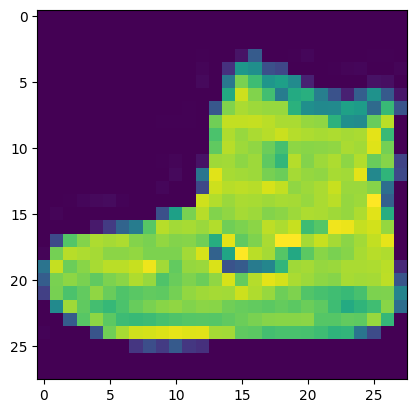

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# you can put between 0 to 59999 here
index = 0

# set number of characters per row when printing
np.set_printoptions(linewidth=320)

# print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'nIMAGE PIXEL ARRAY:\n {training_images[index]}')

#visualize the image
plt.imshow(training_images[index])

LABEL: 4
nIMAGE PIXEL ARRAY:
 [[  0   0   1   0   0   0   1   0   0   0  36 137  59  43  24  24  44 107 102   0   0   0   2   0   0   1   0   0]
 [  0   0   1   0   0   1   1   0 145 151  57 240 188 194 211 204 205 189 243  59   4   0   0   1   0   1   0   0]
 [  0   0   0   0   0   4   0  37 243  72   0 208 210 178 162 149 161 199 138  56 200 207   6   0   2   0   0   0]
 [  0   0   0   0   3   0   0 133 205 175 179 168 192 192 162 156 185 215 175 176 169 217  34   0   8   4   1   0]
 [  0   0   0   2   0   7 145 182 205 218 242 225 221 230 119 160 221 216 255 235 231 227  60   0   2   1   1   0]
 [  0   0   1   0   0 182 176 136 129 141 190 202 197 204 147 188 186 179 166 157 153 162 204  89   0   0   0   0]
 [  0   0   3   0  89 206 159 151 179 141 128 137 133 156 160 151 134 147 143 153 145 168 166 230  24   0   1   0]
 [  0   0   3   0 176 199 198 156 161 171 148 149 158 155 143 157 161 155 155 167 160 196 180 217 135   0   1   0]
 [  0   0   0   4 177 196 209 170 157 160 149 155 

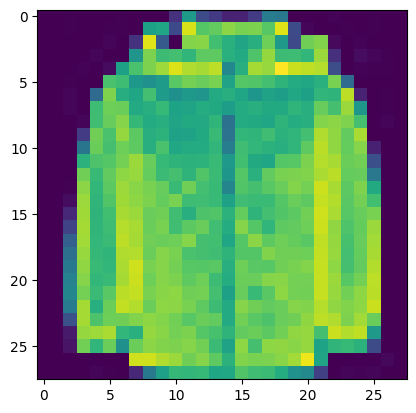

In [7]:
import numpy as np
import matplotlib.pyplot as plt
index = 555
np.set_printoptions(linewidth=320)
print(f'LABEL: {training_labels[index]}')
print(f'nIMAGE PIXEL ARRAY:\n {training_images[index]}')

plt.imshow(training_images[index])

In [8]:
# Normalize the pixel values of the train and test images (0,1) ranged
training_images = training_images / 255.0
test_images = test_images / 255.0 

In [11]:
# Build the classification models
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [12]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function:{inputs.numpy()}')

#Feed the inputs to a softmax function
outputs = tf.keras.activations.softmax(inputs)
print(f'input to softmax function:{inputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

#Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function:[[1. 3. 4. 2.]]
input to softmax function:[[1. 3. 4. 2.]]
sum of outputs: 1.0
class with highest probability: 2


In [15]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5) 

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7871 - loss: 0.6218
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8581 - loss: 0.3908
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8766 - loss: 0.3385
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8860 - loss: 0.3127
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8922 - loss: 0.2930


In [16]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.3477


[0.35193073749542236, 0.8730000257492065]